# K-Means clustering

Implement K-means and use it to cluster some data.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Fira Sans'
plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [12]:
def parse_line(line):
    line = line.split(' ')
    return float(line[0]), float(line[1])

with open('kmeansdata.txt') as file:
    data = np.array(list(map(parse_line, file)))

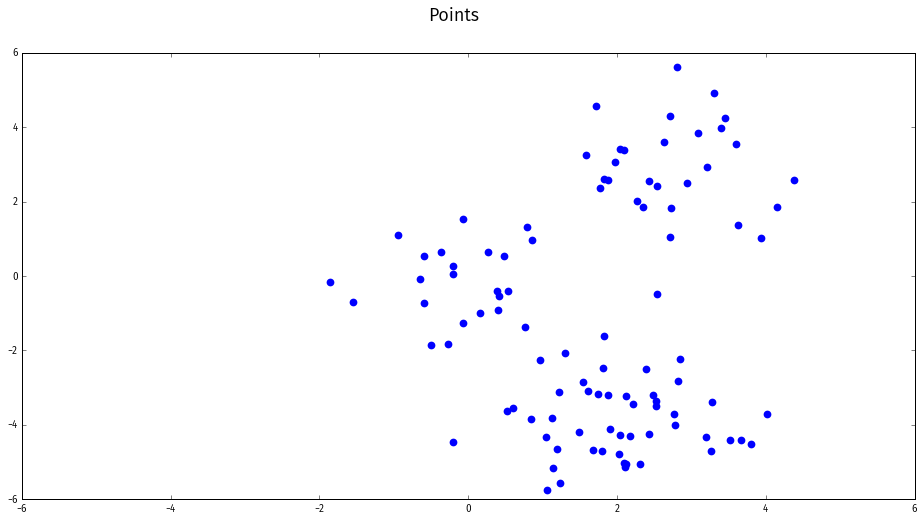

In [146]:
fig, ax = plt.subplots()
fig.suptitle('Points', fontsize=18)
ax.scatter(data[:,0], data[:,1], s=60, linewidths=0)
ax.axis([-6, 6, -6, 6])
plt.show()

In [134]:
def distance(centroid, point):
    return (point - centroid).T.dot(point - centroid)

def closest_centroid(centroids, point):
    return int(np.argmin([distance(centroid, point) for centroid in centroids]))

def init_centroids(k):
    return np.random.rand(k, 2)

def mean_point(points):
    if len(points) == 0:
        return np.random.rand(1, 2)
    return np.mean(points, axis=0)

def kmeans(data, k=2, iterations=10, threshold=0.001):
    n = data.shape[0]
    centroids = init_centroids(k)
    classes = np.zeros(n, dtype=np.int8)
    
    for _ in np.arange(iterations):
        clusters = [[] for _ in np.arange(k)]
        for i in np.arange(n):
            centroid = closest_centroid(centroids, data[i])
            classes[i] = centroid
            clusters[centroid].append(data[i])
            
        old_centroids = centroids[:]
        centroids = np.array([mean_point(cluster) for cluster in clusters])
        
        if np.array([distance(old, new) < threshold for old, new in zip(old_centroids, centroids)]).all():
            break

    return centroids, classes

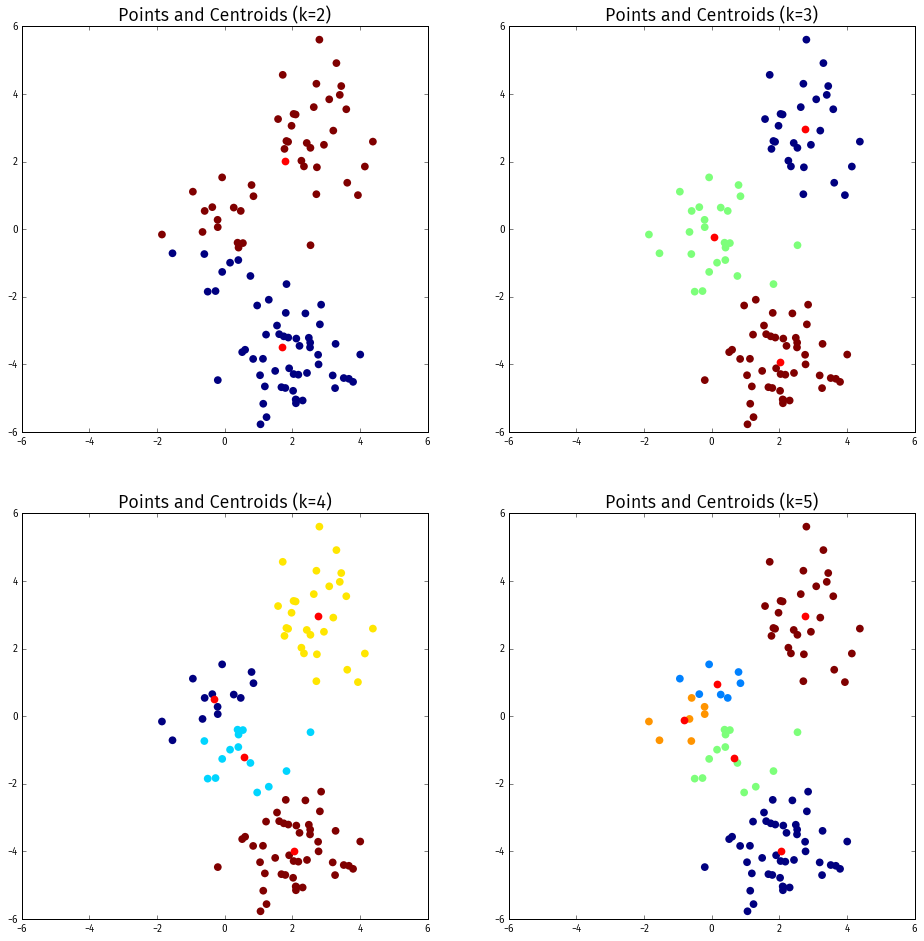

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for k, ax in zip([2, 3, 4, 5], axes.flatten()):
    centroids, classes = kmeans(data, k)
    
    ax.set_title('Points and Centroids (k=%d)' % k, fontsize=18)
    ax.scatter(data[:,0], data[:,1], c=classes, s=60, linewidths=0)
    ax.scatter(centroids[:,0], centroids[:,1], color='red', s=60, linewidths=0)
    ax.axis([-6, 6, -6, 6])
plt.show()